# Proyek Pertama: Predictive Analytics Saham Tesla (2010-2023)
Data set: https://www.kaggle.com/datasets/muhammadbilalhaneef/-tesla-stock-price-from-2010-to-2023?resource=download

# Data Loading
## Import Library

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, LSTM, Dropout

## Load Dataset

In [5]:
df = pd.read_csv("https://raw.githubusercontent.com/Adri720S/PredictiveAnalytics1_Saham-Tesla-2010-2023-/refs/heads/main/Tesla%20Stock%20Price%20(2010%20to%202023).csv")

In [6]:
df.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,29/06/2010,1.266667,1.666667,1.169333,1.592667,1.592667,281494500
1,30/06/2010,1.719333,2.028000,1.553333,1.588667,1.588667,257806500
2,01/07/2010,1.666667,1.728000,1.351333,1.464000,1.464000,123282000
3,02/07/2010,1.533333,1.540000,1.247333,1.280000,1.280000,77097000
4,06/07/2010,1.333333,1.333333,1.055333,1.074000,1.074000,103003500


In [7]:
# Ubah kolom 'Date' menjadi tipe datetime
df['Date'] = pd.to_datetime(df['Date'])

# Set kolom tanggal sebagai index
df.set_index('Date', inplace=True)

# Lihat info dataset
print(df.info())

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 3162 entries, 2010-06-29 to 2023-01-19
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Open       3162 non-null   float64
 1   High       3162 non-null   float64
 2   Low        3162 non-null   float64
 3   Close      3162 non-null   float64
 4   Adj Close  3162 non-null   float64
 5   Volume     3162 non-null   int64  
dtypes: float64(5), int64(1)
memory usage: 172.9 KB
None


<ipython-input-7-4a4f7c8c97b1>:2: UserWarning: Parsing dates in %d/%m/%Y format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.
  df['Date'] = pd.to_datetime(df['Date'])


## Visualisasi Data

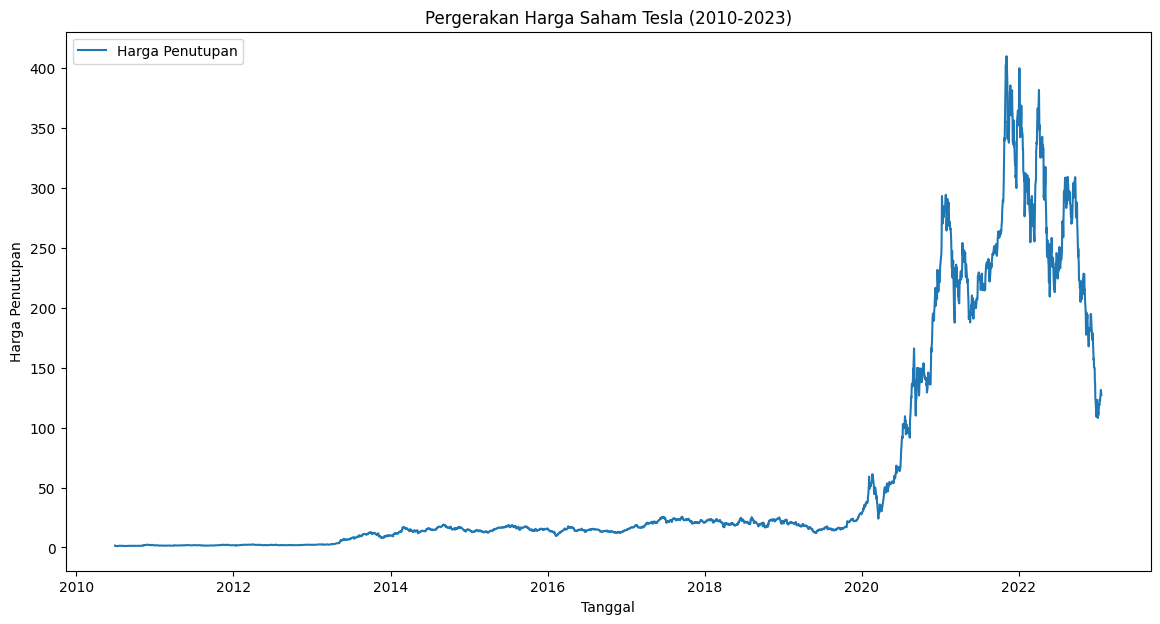

In [9]:
plt.figure(figsize=(14, 7))
plt.plot(df['Close'], label='Harga Penutupan')
plt.title('Pergerakan Harga Saham Tesla (2010-2023)')
plt.xlabel('Tanggal')
plt.ylabel('Harga Penutupan')
plt.legend()
plt.show()

## Preprocessing Data

In [10]:
# Ambil hanya kolom harga penutupan untuk prediksi
data = df[['Close']]

# Normalisasi data untuk meningkatkan performa LSTM
scaler = MinMaxScaler(feature_range=(0, 1))
scaled_data = scaler.fit_transform(data)

# Split data menjadi training dan testing (80% train, 20% test)
train_size = int(len(scaled_data) * 0.8)
train_data = scaled_data[:train_size]
test_data = scaled_data[train_size:]

## Membuat Data Sequence untuk LSTM


In [11]:
# LSTM membutuhkan input dalam bentuk sequence (X) dan target (y)
# Fungsi untuk membuat sequence data
def create_sequences(data, seq_length):
    X, y = [], []
    for i in range(len(data) - seq_length):
        X.append(data[i:i + seq_length, 0])
        y.append(data[i + seq_length, 0])
    return np.array(X), np.array(y)

# Panjang sequence
seq_length = 60  # Menggunakan 60 hari terakhir untuk memprediksi

# Membuat sequence untuk training dan testing
X_train, y_train = create_sequences(train_data, seq_length)
X_test, y_test = create_sequences(test_data, seq_length)

# Ubah bentuk data agar sesuai dengan input LSTM (samples, timesteps, features)
X_train = X_train.reshape((X_train.shape[0], X_train.shape[1], 1))
X_test = X_test.reshape((X_test.shape[0], X_test.shape[1], 1))

## Bangun Model LSTM

In [12]:
# Bangun model LSTM
model = Sequential([
    LSTM(50, return_sequences=True, input_shape=(seq_length, 1)),
    Dropout(0.2),
    LSTM(50, return_sequences=False),
    Dropout(0.2),
    Dense(25),
    Dense(1)
])

# Compile model
model.compile(optimizer='adam', loss='mean_squared_error')

# Latih model
history = model.fit(X_train, y_train, batch_size=32, epochs=50, validation_data=(X_test, y_test))

Epoch 1/50


/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


78/78 ━━━━━━━━━━━━━━━━━━━━ 10s 75ms/step - loss: 3.0487e-04 - val_loss: 0.0178
Epoch 2/50
78/78 ━━━━━━━━━━━━━━━━━━━━ 9s 56ms/step - loss: 9.1312e-05 - val_loss: 0.0121
Epoch 3/50
78/78 ━━━━━━━━━━━━━━━━━━━━ 5s 58ms/step - loss: 4.0231e-05 - val_loss: 0.0156
Epoch 4/50
78/78 ━━━━━━━━━━━━━━━━━━━━ 4s 52ms/step - loss: 3.4697e-05 - val_loss: 0.0463
Epoch 5/50
78/78 ━━━━━━━━━━━━━━━━━━━━ 7s 70ms/step - loss: 2.9353e-05 - val_loss: 0.0167
Epoch 6/50
78/78 ━━━━━━━━━━━━━━━━━━━━ 9s 52ms/step - loss: 3.6371e-05 - val_loss: 0.0191
Epoch 7/50
78/78 ━━━━━━━━━━━━━━━━━━━━ 6s 71ms/step - loss: 2.6126e-05 - val_loss: 0.0098
Epoch 8/50
78/78 ━━━━━━━━━━━━━━━━━━━━ 9s 51ms/step - loss: 3.4704e-05 - val_loss: 0.0211
Epoch 9/50
78/78 ━━━━━━━━━━━━━━━━━━━━ 6s 65ms/step - loss: 2.6266e-05 - val_loss: 0.0217
Epoch 10/50
78/78 ━━━━━━━━━━━━━━━━━━━━ 4s 53ms/step - loss: 2.4171e-05 - val_loss: 0.0157
Epoch 11/50
78/78 ━━━━━━━━━━━━━━━━━━━━ 6s 67ms/step - loss: 2.1381e-05 - val_loss: 0.0068
Epoch 12/50
78/78 ━━━━━━━━━━━

## Evaluasi dan Prediksi

In [13]:
# Prediksi menggunakan data testing
predictions = model.predict(X_test)
predictions = scaler.inverse_transform(predictions)  # Balikkan skala ke bentuk asli

# Balikkan skala y_test ke bentuk asli
y_test_actual = scaler.inverse_transform(y_test.reshape(-1, 1))

# Evaluasi dengan RMSE
from sklearn.metrics import mean_squared_error
rmse = np.sqrt(mean_squared_error(y_test_actual, predictions))
print(f'Root Mean Squared Error (RMSE): {rmse}')

18/18 ━━━━━━━━━━━━━━━━━━━━ 3s 79ms/step
Root Mean Squared Error (RMSE): 53.82427935329128


## Visualisasi Hasil

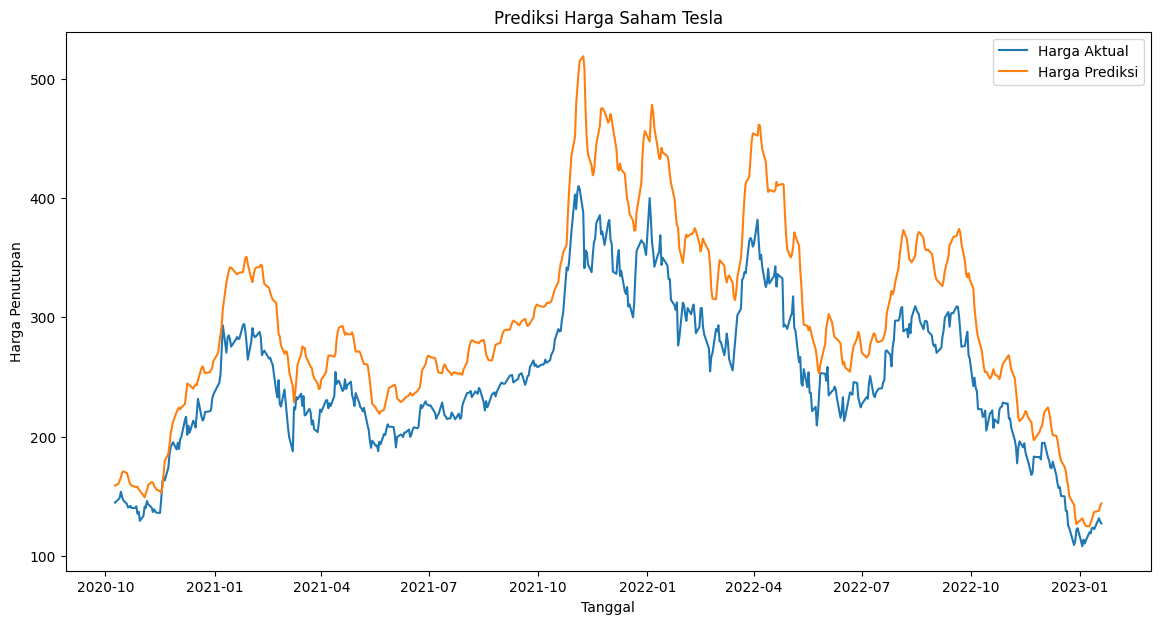

In [14]:
plt.figure(figsize=(14, 7))
plt.plot(df.index[-len(y_test):], y_test_actual, label='Harga Aktual')
plt.plot(df.index[-len(y_test):], predictions, label='Harga Prediksi')
plt.title('Prediksi Harga Saham Tesla')
plt.xlabel('Tanggal')
plt.ylabel('Harga Penutupan')
plt.legend()
plt.show()